# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
from pandas.io.json import json_normalize
from pandas import DataFrame

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

city_dictionary = {'name':[],
                   'id':[]    
}
city_index = 0
city_json = []
for city in cities:
    city_response = requests.get(query_url+city).json()
    city_json.append(city_response)
        
    try:
        city_dictionary['id'].append(city_response["id"])
        city_dictionary['name'].append(city_response["name"])
        print(f"City Name: {city}, City_ID: {city_dictionary['id'][city_index]} ")
        city_index += 1
    
    except:
        print(f"City Name: {city} was not found")
        pass


City Name: rikitea, City_ID: 4030556 
City Name: samusu was not found
City Name: lebu, City_ID: 3883457 
City Name: aklavik, City_ID: 5882953 
City Name: atuona, City_ID: 4020109 
City Name: ushuaia, City_ID: 3833367 
City Name: albany, City_ID: 5106841 
City Name: bluff, City_ID: 2206939 
City Name: manama, City_ID: 290340 
City Name: armacao dos buzios was not found
City Name: sao jose da coroa grande, City_ID: 3388456 
City Name: cabo san lucas, City_ID: 3985710 
City Name: kodiak, City_ID: 5866583 
City Name: punta arenas, City_ID: 3874787 
City Name: faya, City_ID: 110690 
City Name: carutapera, City_ID: 3402648 
City Name: emerald, City_ID: 2167426 
City Name: georgetown, City_ID: 1735106 
City Name: smithers, City_ID: 6149996 
City Name: mataura, City_ID: 6201424 
City Name: hualmay, City_ID: 3939761 
City Name: necochea, City_ID: 3430443 
City Name: naze, City_ID: 1855540 
City Name: nikolskoye, City_ID: 546105 
City Name: san carlos de bariloche, City_ID: 7647007 
City Name: a

City Name: manggar, City_ID: 1636426 
City Name: mikhaylovka, City_ID: 527012 
City Name: oranjemund, City_ID: 3354071 
City Name: samarai, City_ID: 2132606 
City Name: shingu, City_ID: 1847947 
City Name: arraial do cabo, City_ID: 3471451 
City Name: kaura namoda, City_ID: 2334756 
City Name: kaitangata, City_ID: 2208248 
City Name: rocha, City_ID: 3440777 
City Name: rylsk, City_ID: 695019 
City Name: hofn, City_ID: 2630299 
City Name: baraboo, City_ID: 5244638 
City Name: sitka, City_ID: 5557293 
City Name: grindavik, City_ID: 3416888 
City Name: san rafael, City_ID: 3836669 
City Name: sembakung, City_ID: 1627877 
City Name: san patricio, City_ID: 3985168 
City Name: batemans bay, City_ID: 2176639 
City Name: homer, City_ID: 5864145 
City Name: roald, City_ID: 3141667 
City Name: lata, City_ID: 2738381 
City Name: ambilobe, City_ID: 1082243 
City Name: longyearbyen, City_ID: 2729907 
City Name: sorland, City_ID: 3137469 
City Name: abu kamal, City_ID: 174448 
City Name: ribeira gra

City Name: olafsvik, City_ID: 3414079 
City Name: byron bay, City_ID: 2172880 
City Name: yumen, City_ID: 1528998 
City Name: biak, City_ID: 1637001 
City Name: petropavlovsk-kamchatskiy, City_ID: 2122104 
City Name: clyde river, City_ID: 5924351 
City Name: grand gaube, City_ID: 934479 
City Name: adre, City_ID: 245669 
City Name: maarianhamina, City_ID: 3041732 
City Name: kerema, City_ID: 2094144 
City Name: turan, City_ID: 1583992 
City Name: meshcherino, City_ID: 527429 
City Name: marrakesh, City_ID: 2542997 
City Name: killybegs, City_ID: 2963295 
City Name: somcuta mare, City_ID: 666475 
City Name: capreol, City_ID: 5959803 
City Name: torit, City_ID: 365742 
City Name: kisangani, City_ID: 212730 
City Name: yarmouth, City_ID: 4956335 
City Name: nemuro, City_ID: 2128975 
City Name: pacific grove, City_ID: 5380437 
City Name: umm jarr was not found
City Name: alcantara, City_ID: 3408073 
City Name: sechura, City_ID: 3691954 
City Name: glendive, City_ID: 5654391 
City Name: ara

[{'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 296.46,
   'feels_like': 298.21,
   'temp_min': 296.46,
   'temp_max': 296.46,
   'pressure': 1017,
   'humidity': 86,
   'sea_level': 1017,
   'grnd_level': 1014},
  'wind': {'speed': 3.36, 'deg': 287},
  'clouds': {'all': 100},
  'dt': 1594876665,
  'sys': {'country': 'PF', 'sunrise': 1594827617, 'sunset': 1594866667},
  'timezone': -32400,
  'id': 4030556,
  'name': 'Rikitea',
  'cod': 200},
 {'cod': '404', 'message': 'city not found'},
 {'coord': {'lon': -73.65, 'lat': -37.62},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 283.41,
   'feels_like': 280.94,
   'temp_min': 283.41,
   'temp_max': 283.41,
   'pressure': 1015,
   'humidity': 90,
   'sea_level': 1015,
   'grnd_level': 1004},
  'wind'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
city_df=pd.json_normalize(city_json, meta =['name', 
                                                ['coord','lat'], 
                                                ['coord','lon'], 
                                                ['main','temp_max'],
                                                ['main','humidity'],
                                                ['clouds','all'],
                                                ['wind','speed'],
                                                ['sys','country'],
                                                'dt'
                                                ]
                      )
city_df_drop = city_df.drop(['weather',
                        'base',
                        'visibility',
                        'timezone',
                        'id',
                        'cod',
                        'main.pressure',
                        'wind.deg',
                        'sys.type',
                        'sys.sunrise',
                        'sys.sunset',
                        'main.feels_like',
                        'main.temp_min',
                        'sys.id',
                        'main.temp'
                       ], 
                       axis=1
                      )

city_final = city_df_drop[['name', 
                           'coord.lat',
                           'coord.lon',
                           'main.temp_max', 
                           'main.humidity', 
                           'clouds.all', 
                           'wind.speed',
                           'sys.country', 
                           'dt'                           
                          ]
                         ]
city_rename = city_final.rename(columns = {'name':'City', 
                                        'coord.lat':'Lat',
                                        'coord.lon':'Lng',
                                        'main.temp_max':'Max Temp', 
                                        'main.humidity':'Humidity', 
                                        'clouds.all':'Cloudiness', 
                                        'wind.speed':'Wind Speed',
                                        'sys.country':'Country', 
                                        'dt':'Date'
                                     },
                          )

city_rename_df = pd.DataFrame(city_rename)
city_final_df=city_rename_df.set_index('City')

city_csv = city_final_df.to_csv(output_data_file)


In [67]:
city_final_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
Rikitea,-23.12,-134.97,296.46,86.0,100.0,3.36,PF,1.594877e+09
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lebu,-37.62,-73.65,283.41,90.0,100.0,3.10,CL,1.594877e+09
Aklavik,68.22,-135.01,289.15,59.0,75.0,5.10,CA,1.594877e+09
Atuona,-9.80,-139.03,299.60,77.0,1.0,7.88,PF,1.594877e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
df = pd.read_csv(output_data_file)
df = df.dropna(how='any')
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.745364,16.072948,293.652274,70.808171,49.364121,3.359964,1.594877e+09
std,32.753831,90.705163,8.016637,20.898044,38.177949,2.391334,8.049758e+01
min,-54.800000,-175.200000,272.150000,10.000000,0.000000,0.090000,1.594876e+09
25%,-4.890000,-66.970000,288.150000,59.000000,7.500000,1.500000,1.594877e+09
50%,22.290000,21.780000,294.120000,75.000000,44.000000,2.930000,1.594877e+09
75%,47.840000,98.140000,300.150000,87.000000,90.000000,4.600000,1.594877e+09
max,78.220000,179.320000,315.320000,100.000000,100.000000,18.500000,1.594877e+09


In [63]:
#  Get the indices of cities that have humidity over 100%.


In [64]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [65]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

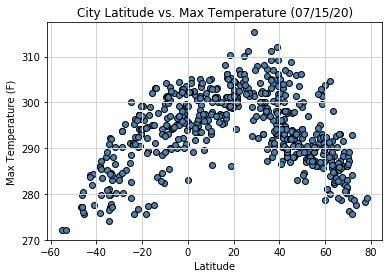

<Figure size 432x288 with 0 Axes>

In [138]:
temp = df['Max Temp']
lat = df['Lat']

plt.scatter(lat, temp, facecolors='steelblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (07/15/20)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.show()

plt.savefig('output_data/CityLatitude_MaxTemp.png')

## Latitude vs. Humidity Plot

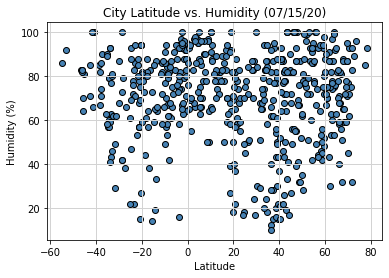

<Figure size 432x288 with 0 Axes>

In [139]:
hum = df["Humidity"]

plt.scatter(lat, hum, facecolors='steelblue', edgecolors='black')
plt.title('City Latitude vs. Humidity (07/15/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.show()

plt.savefig('output_data/CityLatitude_humidity.png')

## Latitude vs. Cloudiness Plot

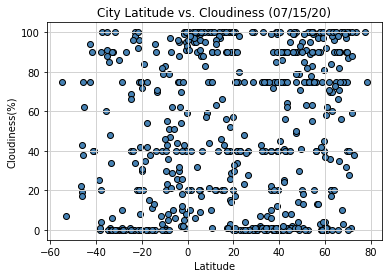

<Figure size 432x288 with 0 Axes>

In [140]:
cloud = df['Cloudiness']

plt.scatter(lat, cloud, facecolors='steelblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (07/15/20)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.show()

plt.savefig('output_data/CityLatitude_Cloudiness.png')

## Latitude vs. Wind Speed Plot

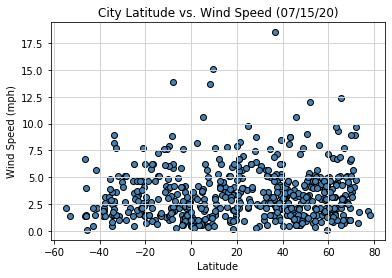

<Figure size 432x288 with 0 Axes>

In [141]:
wind = df["Wind Speed"]

plt.scatter(lat, wind, facecolors='steelblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (07/15/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.show()

plt.savefig('output_data/CityLatitude_WindSpeed.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [98]:
# Create Northern and Southern Hemisphere DataFrames
True
northern = df[(df['Lat'] >0)]
southern = df[(df['Lat'] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3861718188713442


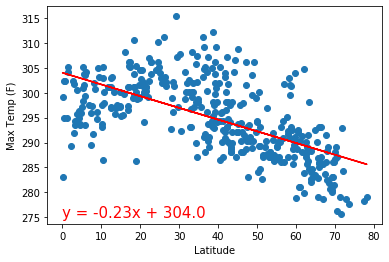

<Figure size 432x288 with 0 Axes>

In [142]:
n_lat = northern['Lat']
n_max = northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat,n_max)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_max, facecolors='tab:blue')
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq, (0,275),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
n_r1 = rvalue * rvalue

print(f"The r-squared is: {n_r1}")
plt.show()

plt.savefig('output_data/Northern_CityLatitude_MaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5255161517416711


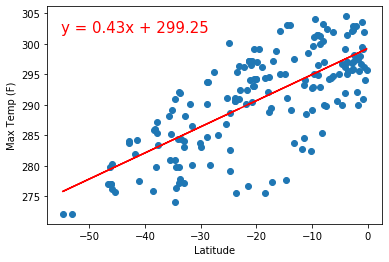

<Figure size 432x288 with 0 Axes>

In [143]:
s_lat = southern['Lat']
s_max = southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_max)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_max, facecolors='tab:blue')
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq, (-55,302),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
s_r1 = rvalue * rvalue

print(f"The r-squared is: {s_r1}")
plt.show()

plt.savefig('output_data/Southern_CityLatitude_MaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002365780363185096


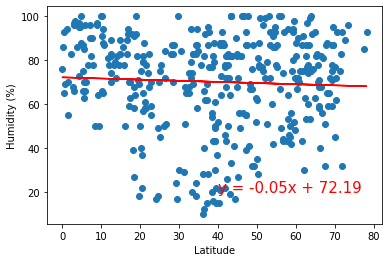

<Figure size 432x288 with 0 Axes>

In [144]:
n_hum = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat,n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_hum, facecolors='tab:blue')
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq, (40,20),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
n_r2 = rvalue * rvalue

print(f"The r-squared is: {n_r2}")
plt.show()

plt.savefig('output_data/Northern_CityLatitude_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005004951744076226


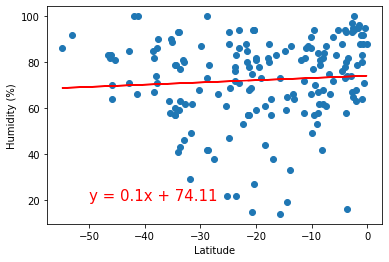

<Figure size 432x288 with 0 Axes>

In [145]:
s_hum = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_hum)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_hum, facecolors='tab:blue')
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq, (-50,20),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
s_r2 = rvalue * rvalue

print(f"The r-squared is: {s_r2}")
plt.show()

plt.savefig('output_data/Southern_CityLatitude_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006858752967320704


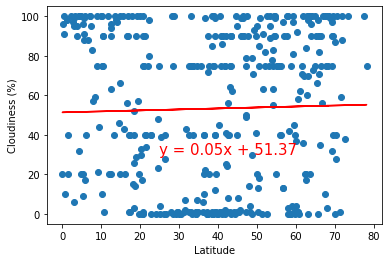

<Figure size 432x288 with 0 Axes>

In [146]:
n_cloud = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat,n_cloud)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_cloud, facecolors='tab:blue')
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq, (25,30),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
n_r3 = rvalue * rvalue

print(f"The r-squared is: {n_r3}")
plt.show()

plt.savefig('output_data/Northern_CityLatitude_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005119878855067564


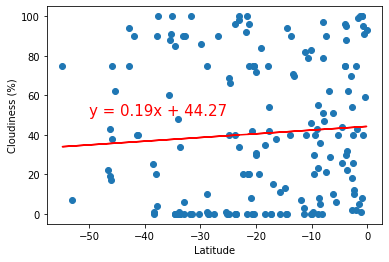

<Figure size 432x288 with 0 Axes>

In [147]:
s_cloud = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_cloud, facecolors='tab:blue')
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq, (-50,50),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
s_r3 = rvalue * rvalue

print(f"The r-squared is: {s_r3}")
plt.show()

plt.savefig('output_data/Southern_CityLatitude_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0011293422580142367


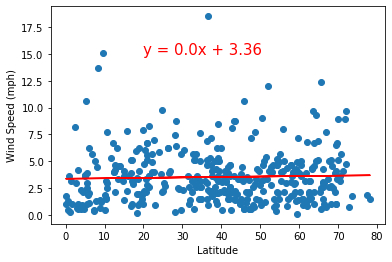

<Figure size 432x288 with 0 Axes>

In [148]:
n_wind = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat,n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_wind, facecolors='tab:blue')
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq, (20,15),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
n_r4 = rvalue * rvalue

print(f"The r-squared is: {n_r4}")
plt.show()

plt.savefig('output_data/Northern_CityLatitude_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000672108023155072


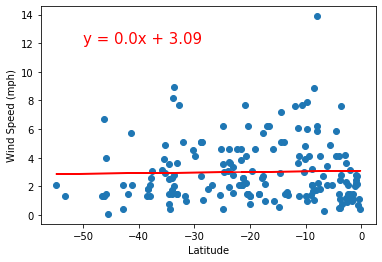

<Figure size 432x288 with 0 Axes>

In [149]:
s_wind = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_wind, facecolors='tab:blue')
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq, (-50,12),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
s_r4 = rvalue * rvalue

print(f"The r-squared is: {s_r4}")
plt.show()

plt.savefig('output_data/Southern_CityLatitude_WindSpeed.png')